[JUG](https://jug.dpieczynski.pl/lab-ead/Lab%2002%20-%20SQL,%20RESTful%20API.html)

# SQLite w Python - sqlite3

In [1]:
import sqlite3

In [2]:
#!wget https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite

In [2]:
conn = sqlite3.connect("Chinook_Sqlite.sqlite")  # połączenie do bazy danych - pliku
c = conn.cursor()

for row in c.execute('SELECT * FROM Album LIMIT 10'):
    print(row)

conn.close()

(1, 'For Those About To Rock We Salute You', 1)
(2, 'Balls to the Wall', 2)
(3, 'Restless and Wild', 2)
(4, 'Let There Be Rock', 1)
(5, 'Big Ones', 3)
(6, 'Jagged Little Pill', 4)
(7, 'Facelift', 5)
(8, 'Warner 25 Anos', 6)
(9, 'Plays Metallica By Four Cellos', 7)
(10, 'Audioslave', 8)


🔥 Zadanie 1 🔥

Pobierz z tabeli Invoice listę transakcji zawierającą InvoiceId, CustomerId, BillingCity oraz Total z kraju USA, sortując wpisy po nazwie miasta, w kolejności odwrotnej do alfabetycznej.

In [3]:
conn = sqlite3.connect("Chinook_Sqlite.sqlite")  # połączenie do bazy danych - pliku
conn.cursor()

query = "SELECT InvoiceId, CustomerId, BillingCity, Total from Invoice where BillingCountry = 'USA' ORDER BY BillingCity DESC LIMIT 10"
for row in conn.execute(query):
    invoice_id, customer_id, billing_city, total = row
    print(f'InvoiceId: {invoice_id}, CustomerId: {customer_id}, BillingCity: {billing_city}, Total: {total}')

conn.close()

InvoiceId: 39, CustomerId: 27, BillingCity: Tucson, Total: 8.91
InvoiceId: 168, CustomerId: 27, BillingCity: Tucson, Total: 1.98
InvoiceId: 191, CustomerId: 27, BillingCity: Tucson, Total: 3.96
InvoiceId: 213, CustomerId: 27, BillingCity: Tucson, Total: 5.94
InvoiceId: 265, CustomerId: 27, BillingCity: Tucson, Total: 0.99
InvoiceId: 386, CustomerId: 27, BillingCity: Tucson, Total: 1.98
InvoiceId: 397, CustomerId: 27, BillingCity: Tucson, Total: 13.86
InvoiceId: 71, CustomerId: 28, BillingCity: Salt Lake City, Total: 1.98
InvoiceId: 82, CustomerId: 28, BillingCity: Salt Lake City, Total: 13.86
InvoiceId: 137, CustomerId: 28, BillingCity: Salt Lake City, Total: 8.91


In [4]:
conn = sqlite3.connect("Chinook_Sqlite.sqlite")  # połączenie do bazy danych - pliku
conn.cursor()

query = 'SELECT Track.Name, Album.Title FROM Track INNER JOIN Album ON Track.AlbumId = Album.AlbumId LIMIT 10'
for row in conn.execute(query):
    track_name, album_title = row
    print(f'TrackName: {track_name}, AlbumTitle: {album_title}')
conn.close()

TrackName: For Those About To Rock (We Salute You), AlbumTitle: For Those About To Rock We Salute You
TrackName: Balls to the Wall, AlbumTitle: Balls to the Wall
TrackName: Fast As a Shark, AlbumTitle: Restless and Wild
TrackName: Restless and Wild, AlbumTitle: Restless and Wild
TrackName: Princess of the Dawn, AlbumTitle: Restless and Wild
TrackName: Put The Finger On You, AlbumTitle: For Those About To Rock We Salute You
TrackName: Let's Get It Up, AlbumTitle: For Those About To Rock We Salute You
TrackName: Inject The Venom, AlbumTitle: For Those About To Rock We Salute You
TrackName: Snowballed, AlbumTitle: For Those About To Rock We Salute You
TrackName: Evil Walks, AlbumTitle: For Those About To Rock We Salute You


🔥 Zadanie 2 🔥

Stwórz zapytanie SQL do bazy, dzięki któremu uzyskasz listę albumów wraz z ich wykonawcą.

Przetestuj różne formy JOIN (INNER oraz LEFT), dla wariantu LEFT sprawdź wynik w sytuacjach kiedy pierwszym argumentem jest tablica z albumami oraz tablica z wykonawcami. Zatanów się z czego wynikają różnice.

In [6]:
conn = sqlite3.connect("Chinook_Sqlite.sqlite")  # połączenie do bazy danych - pliku
conn.cursor()

query = 'SELECT  Album.Title, Artist.Name  FROM Artist LEFT JOIN Album ON Album.ArtistId = Artist.ArtistId'
for i, row in enumerate(conn.execute(query)):
    print(f'Row {i+1}: {row}')
conn.close()

Row 1: ('For Those About To Rock We Salute You', 'AC/DC')
Row 2: ('Let There Be Rock', 'AC/DC')
Row 3: ('Balls to the Wall', 'Accept')
Row 4: ('Restless and Wild', 'Accept')
Row 5: ('Big Ones', 'Aerosmith')
Row 6: ('Jagged Little Pill', 'Alanis Morissette')
Row 7: ('Facelift', 'Alice In Chains')
Row 8: ('Warner 25 Anos', 'Antônio Carlos Jobim')
Row 9: ('Chill: Brazil (Disc 2)', 'Antônio Carlos Jobim')
Row 10: ('Plays Metallica By Four Cellos', 'Apocalyptica')
Row 11: ('Audioslave', 'Audioslave')
Row 12: ('Out Of Exile', 'Audioslave')
Row 13: ('Revelations', 'Audioslave')
Row 14: ('BackBeat Soundtrack', 'BackBeat')
Row 15: ('The Best Of Billy Cobham', 'Billy Cobham')
Row 16: ('Alcohol Fueled Brewtality Live! [Disc 1]', 'Black Label Society')
Row 17: ('Alcohol Fueled Brewtality Live! [Disc 2]', 'Black Label Society')
Row 18: ('Black Sabbath', 'Black Sabbath')
Row 19: ('Black Sabbath Vol. 4 (Remaster)', 'Black Sabbath')
Row 20: ('Body Count', 'Body Count')
Row 21: ('Chemical Wedding', 'Br

# REST API, usługi RESTful

In [7]:
import requests
import json

req = requests.get("https://blockchain.info/ticker")  # wysłanie zapytania GET pod odpowiedni adres, zapisanie odpowiedzi
print(req.text)  # zawartość odpowiedzi znajduje się w polu text

bitcoin_dict = json.loads(req.text) # deserializacja odpowiedzi (string) do słownika
print(bitcoin_dict)

{"ARS":{"15m":1.194986815E7,"last":1.194986815E7,"buy":1.194986815E7,"sell":1.194986815E7,"symbol":"ARS"},"AUD":{"15m":53889.61,"last":53889.61,"buy":53889.61,"sell":53889.61,"symbol":"AUD"},"BRL":{"15m":171174.58,"last":171174.58,"buy":171174.58,"sell":171174.58,"symbol":"BRL"},"CAD":{"15m":47390.15,"last":47390.15,"buy":47390.15,"sell":47390.15,"symbol":"CAD"},"CHF":{"15m":30792.14,"last":30792.14,"buy":30792.14,"sell":30792.14,"symbol":"CHF"},"CLP":{"15m":3.180665784E7,"last":3.180665784E7,"buy":3.180665784E7,"sell":3.180665784E7,"symbol":"CLP"},"CNY":{"15m":249788.72,"last":249788.72,"buy":249788.72,"sell":249788.72,"symbol":"CNY"},"CZK":{"15m":796105.96,"last":796105.96,"buy":796105.96,"sell":796105.96,"symbol":"CZK"},"DKK":{"15m":241192.5,"last":241192.5,"buy":241192.5,"sell":241192.5,"symbol":"DKK"},"EUR":{"15m":32315.47,"last":32315.47,"buy":32315.47,"sell":32315.47,"symbol":"EUR"},"GBP":{"15m":28148.96,"last":28148.96,"buy":28148.96,"sell":28148.96,"symbol":"GBP"},"HKD":{"15m"

🔥 Zadanie 3 🔥

Stwórz na podstawie powyższego zapytania DataFrame, w którym umieścisz wszystkie odebrane dane. Indeksem powinny być trzyznakowe symbole waluty, a kolumnami wartości kursów oraz symbol waluty (15m, last, buy, sell, symbol).

In [8]:
import pandas as pd

df = pd.DataFrame(bitcoin_dict).transpose()
print(df)


             15m         last          buy         sell symbol
ARS  11949868.15  11949868.15  11949868.15  11949868.15    ARS
AUD     53889.61     53889.61     53889.61     53889.61    AUD
BRL    171174.58    171174.58    171174.58    171174.58    BRL
CAD     47390.15     47390.15     47390.15     47390.15    CAD
CHF     30792.14     30792.14     30792.14     30792.14    CHF
CLP  31806657.84  31806657.84  31806657.84  31806657.84    CLP
CNY    249788.72    249788.72    249788.72    249788.72    CNY
CZK    796105.96    796105.96    796105.96    796105.96    CZK
DKK     241192.5     241192.5     241192.5     241192.5    DKK
EUR     32315.47     32315.47     32315.47     32315.47    EUR
GBP     28148.96     28148.96     28148.96     28148.96    GBP
HKD    266996.52    266996.52    266996.52    266996.52    HKD
HRK    122743.77    122743.77    122743.77    122743.77    HRK
HUF  12375185.61  12375185.61  12375185.61  12375185.61    HUF
INR   2847763.15   2847763.15   2847763.15   2847763.15

## OpenWeather API

In [10]:
from open_weather_api import API_KEY

🔥 Zadanie 4 🔥

1. Sprawdź lokalizację (długość i szerokość geograficzną) swojego ulubionego miasta i odpytaj API o prognozę pogody dla niego.

2. Zwróć uwagę na odczytane temperatury. Sprawdź w dokumentacji jak przełączyć jednostki na metryczne i popraw zapytanie.

3. Przepisz informacje z prognozy godzinnej (pole hourly) odczytanego JSON-a do DataFrame. Umieść w DataFrame kolumny takie jak temp, feels_like, humidity, wind_speed. Zwróć uwagę na pola dt w uzyskanej odpowiedzi - są to znaczniki czasu w formacie UNIX (sekundy liczone od 00:00:00 UTC on 1 January 1970). Skonwertuj znaczniki na format Datetime pandasa, wykorzystując funkcję pd.to_datetime: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

4. Wykreśl prognozę pogody na wykresie liniowym korzystając z metody pd.DataFrame.plot


In [11]:
# 4.1

city = 'San Francisco'
country_code = 'US'

base_url = f'http://api.openweathermap.org/data/2.5/weather?q={city},{country_code}&appid={API_KEY}'

def get_weather_data(url):
    response = requests.get(base_url)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Extract relevant information from the response
        temperature = data['main']['temp']
        weather_description = data['weather'][0]['description']

        # Print the weather information
        print(f'Temperature: {temperature}')
        print(f'Weather Description: {weather_description}')

        return data


data = get_weather_data(base_url)
data

Temperature: 287.29
Weather Description: clear sky


{'coord': {'lon': -122.4194, 'lat': 37.7749},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 287.29,
  'feels_like': 285.6,
  'temp_min': 283.28,
  'temp_max': 289.29,
  'pressure': 1020,
  'humidity': 32},
 'visibility': 10000,
 'wind': {'speed': 3.58, 'deg': 25, 'gust': 7.15},
 'clouds': {'all': 0},
 'dt': 1698568060,
 'sys': {'type': 2,
  'id': 2017837,
  'country': 'US',
  'sunrise': 1698589900,
  'sunset': 1698628496},
 'timezone': -25200,
 'id': 5391959,
 'name': 'San Francisco',
 'cod': 200}

In [12]:
units = 'metric'
base_url = f'http://api.openweathermap.org/data/2.5/weather?q={city},{country_code}&appid={API_KEY}&units={units}'
data = get_weather_data(base_url)

Temperature: 14.14
Weather Description: clear sky


In [31]:
latitude = 52.409538
longitude = 16.931992
url = "https://api.openweathermap.org/data/2.5/onecall"

hourly_url = f"{url}?lat={latitude}&lon={longitude}&units=metric&exclude=minutely&appid={API_KEY}"
response = requests.get(hourly_url)
weather_data = response.json()
if response.status_code == 200:
    weather_data = response.json()

    for item in weather_data['hourly']:
        item['dt'] = pd.to_datetime(item['dt'], unit='s', utc=True)

else:
    print('Error while requesting data')
    
# with open('weather_data.json', 'w') as f:
#     json.dump(weather_data, f, indent=4)

weather_data

{'lat': 52.4095,
 'lon': 16.932,
 'timezone': 'Europe/Warsaw',
 'timezone_offset': 3600,
 'current': {'dt': 1698568585,
  'sunrise': 1698558105,
  'sunset': 1698593404,
  'temp': 10.53,
  'feels_like': 10.15,
  'pressure': 1003,
  'humidity': 96,
  'dew_point': 9.92,
  'uvi': 0.07,
  'clouds': 100,
  'visibility': 10000,
  'wind_speed': 4.12,
  'wind_deg': 180,
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'rain': {'1h': 0.16}},
 'hourly': [{'dt': Timestamp('2023-10-29 08:00:00+0000', tz='UTC'),
   'temp': 10.39,
   'feels_like': 9.97,
   'pressure': 1003,
   'humidity': 95,
   'dew_point': 9.62,
   'uvi': 0.04,
   'clouds': 100,
   'visibility': 10000,
   'wind_speed': 3.8,
   'wind_deg': 174,
   'wind_gust': 8.08,
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'pop': 0.82,
   'rain': {'1h': 0.94}},
  {'dt': Timestamp('2023-10-29 09:00:00+0000', tz='UTC'),
   'temp': 10.

In [43]:
from datetime import datetime

Timestamp('2023-10-29 08:00:00+0000', tz='UTC')

In [48]:
for id, item in enumerate(weather_data['hourly']):
    date = pd.to_datetime(weather_data['hourly'][id]['dt'], unit='s', utc=True)
    temp = weather_data['hourly'][id]['temp']

    print(f'Item {id}, date: {date}, temp: {temp}')


Item 0, date: 2023-10-29 08:00:00+00:00, temp: 10.39
Item 1, date: 2023-10-29 09:00:00+00:00, temp: 10.53
Item 2, date: 2023-10-29 10:00:00+00:00, temp: 10.48
Item 3, date: 2023-10-29 11:00:00+00:00, temp: 10.67
Item 4, date: 2023-10-29 12:00:00+00:00, temp: 11.32
Item 5, date: 2023-10-29 13:00:00+00:00, temp: 12.43
Item 6, date: 2023-10-29 14:00:00+00:00, temp: 13.19
Item 7, date: 2023-10-29 15:00:00+00:00, temp: 13.15
Item 8, date: 2023-10-29 16:00:00+00:00, temp: 12.84
Item 9, date: 2023-10-29 17:00:00+00:00, temp: 12.82
Item 10, date: 2023-10-29 18:00:00+00:00, temp: 12.76
Item 11, date: 2023-10-29 19:00:00+00:00, temp: 12.43
Item 12, date: 2023-10-29 20:00:00+00:00, temp: 11.88
Item 13, date: 2023-10-29 21:00:00+00:00, temp: 12.29
Item 14, date: 2023-10-29 22:00:00+00:00, temp: 13.18
Item 15, date: 2023-10-29 23:00:00+00:00, temp: 13.59
Item 16, date: 2023-10-30 00:00:00+00:00, temp: 13.38
Item 17, date: 2023-10-30 01:00:00+00:00, temp: 13.22
Item 18, date: 2023-10-30 02:00:00+00:

In [49]:
import json

with open('ow.dump.json', 'r') as f:
    json_obj = json.load(f)

print(json_obj['hourly'])
df_hourly = pd.DataFrame(json_obj['hourly'])

df_hourly = df_hourly.loc[:, ['dt', 'temp', 'feels_like', 'humidity', 'wind_speed']]

df_hourly['dt'] = pd.to_datetime(df_hourly['dt'], unit='s')

df_hourly.head()

[{'dt': 1666191600, 'temp': 291.81, 'feels_like': 290.25, 'pressure': 1022, 'humidity': 20, 'dew_point': 268.96, 'uvi': 0.21, 'clouds': 72, 'visibility': 10000, 'wind_speed': 2.24, 'wind_deg': 27, 'wind_gust': 2.29, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'pop': 0}, {'dt': 1666195200, 'temp': 292.31, 'feels_like': 290.78, 'pressure': 1022, 'humidity': 19, 'dew_point': 268.72, 'uvi': 0.87, 'clouds': 73, 'visibility': 10000, 'wind_speed': 1.77, 'wind_deg': 35, 'wind_gust': 2.19, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'pop': 0}, {'dt': 1666198800, 'temp': 292.64, 'feels_like': 291.11, 'pressure': 1022, 'humidity': 18, 'dew_point': 268.33, 'uvi': 2.08, 'clouds': 74, 'visibility': 10000, 'wind_speed': 1.8, 'wind_deg': 47, 'wind_gust': 2.53, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'pop': 0}, {'dt': 1666202400, 'temp': 293.51, 'feels_like': 

,dt,temp,feels_like,humidity,wind_speed
0,2022-10-19 15:00:00,291.81,290.25,20,2.24
1,2022-10-19 16:00:00,292.31,290.78,19,1.77
2,2022-10-19 17:00:00,292.64,291.11,18,1.80
3,2022-10-19 18:00:00,293.51,292.05,17,2.11
4,2022-10-19 19:00:00,294.65,293.27,16,2.99


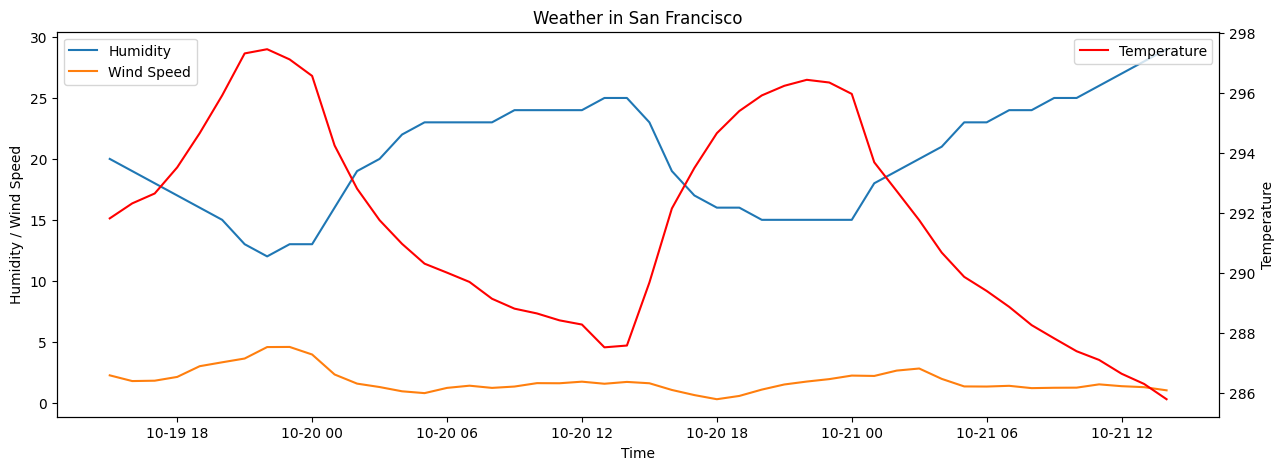

In [50]:



import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 5))

# plot humidity and wind speed on the left y-axis
ax1.plot(df_hourly['dt'], df_hourly['humidity'], label='Humidity')
ax1.plot(df_hourly['dt'], df_hourly['wind_speed'], label='Wind Speed')
ax1.set_xlabel('Time')
ax1.set_ylabel('Humidity / Wind Speed')
ax1.legend()

# create a second y-axis on the right for temperature
ax2 = ax1.twinx()
ax2.plot(df_hourly['dt'], df_hourly['temp'], color='red', label='Temperature')
ax2.set_ylabel('Temperature')
ax2.legend()

plt.title('Weather in San Francisco')
plt.show()
